In [312]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [313]:
md = {}
#md['normal'] = {}
#md['pois'] = {}
#md['binom'] = {}
#md['chisq'] = {}
#md['laplace'] = {}
distributions = ['Normal', 'Poisson', 'Binomial' , 'Chisquared', 'Laplace']
for dist in distributions:
    md[dist] = {}
mymean = 100
#mysize = 2000/np.array(range(1,100)).astype(int)
mysize = []
tmp=20
for i in range(1, 100):
    tmp+=20
    mysize.append(tmp)

In [314]:
for n in mysize:
    md['Normal'][n] = np.random.normal(mymean, 1, n).mean()
    md['Poisson'][n] = np.random.poisson(mymean, n).mean()
    md['Binomial'][n] = np.random.binomial(mymean*2, 0.5, n).mean()
    md['Chisquared'][n] = np.random.chisquare(mymean, n).mean()
    md['Laplace'][n] = np.random.laplace(mymean, 2, n).mean()

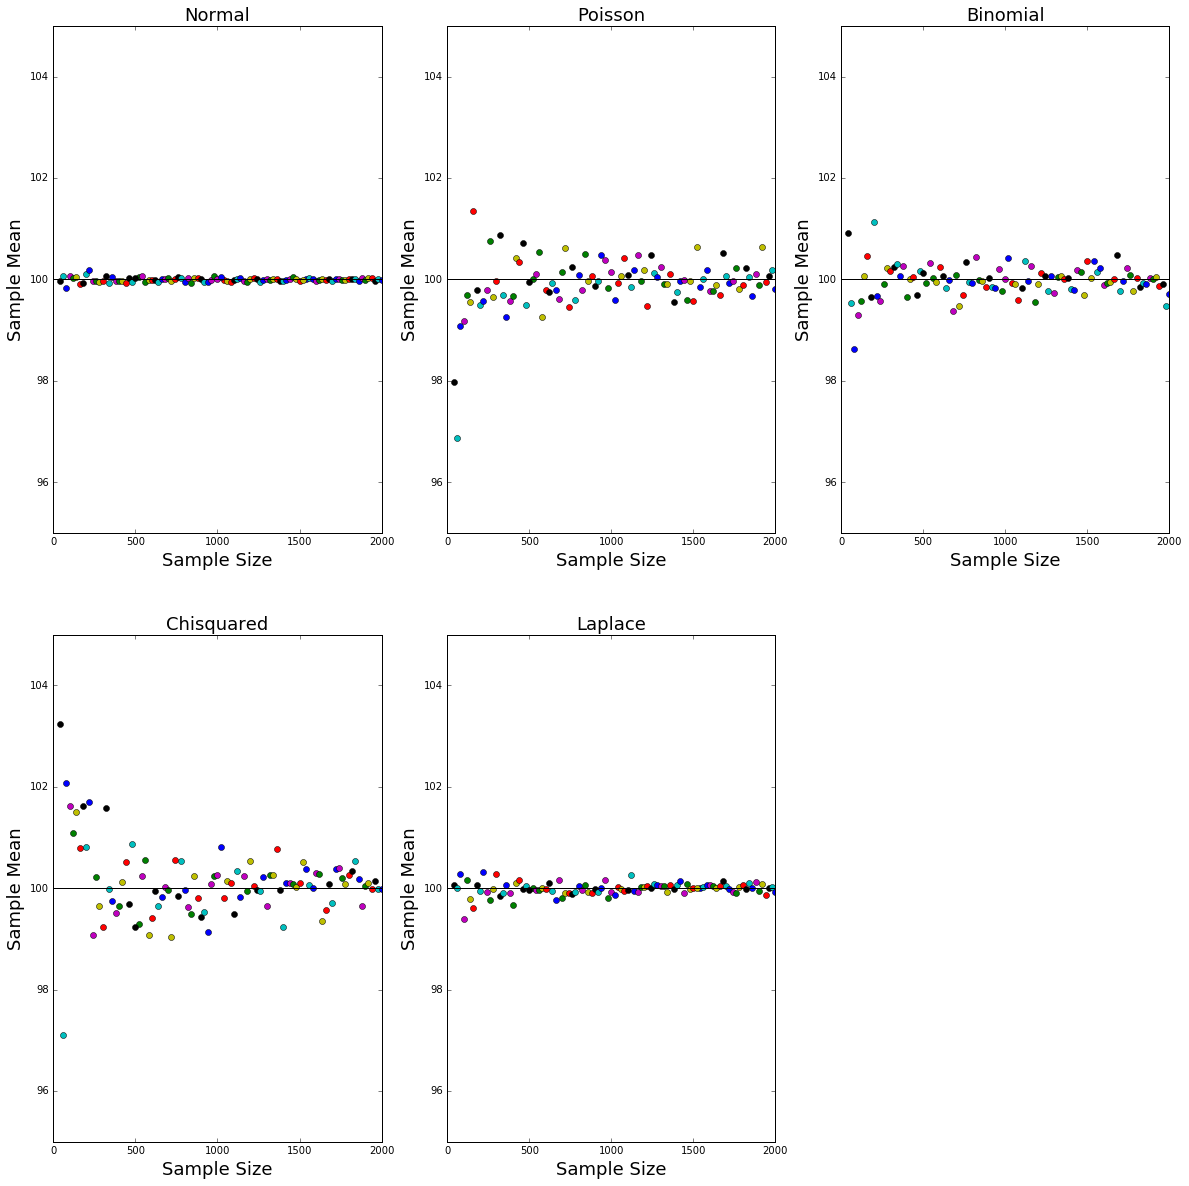

In [319]:
count = 231
plt.figure(figsize = (20,20))
for dist in distributions:
    plt.subplot(count)
    for nn in md[dist]:
        plt.plot(nn, md[dist][nn],'o')
        plt.axhline(y=100, color='k')
        plt.ylim((95,105))
        plt.xlabel('Sample Size', fontsize=18)
        plt.ylabel('Sample Mean', fontsize=18)
        plt.title(dist, fontsize=18)
    count+=1

## Figure 1:

Shows the sample mean against the sample size, for all 5 different distributions.

The plots verify the central limit theorem, since as the sample size increases, the sample mean tends to be closer to the population mean.

In [317]:
allmeans= []
for dist in distributions:
    allmeans.extend(list(md[dist].values()))
    
mu = np.mean(allmeans)
std = np.std(allmeans)

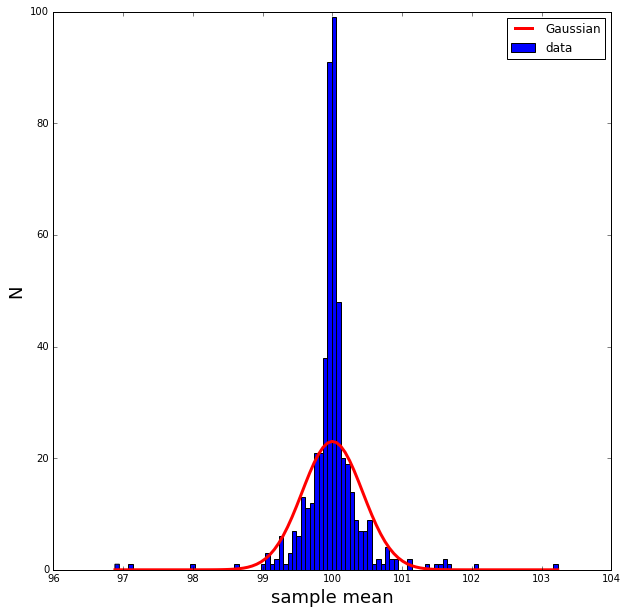

In [333]:
plt.figure(figsize=(10, 10))
count, bins, ignored = plt.hist(allmeans,bins=100 ,label = 'data')
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.plot(bins, 25*(1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * std**2)) ), linewidth=3, color='r', 
         label = 'Gaussian')
plt.legend()

## Figure 2:

Shows the distribution of the aggregated sample means for all 5 distributions and a gaussian distribution on top of the data.

The plot further verifies the central limit theorem, since the sample means seem to follow a normal distribution with mean equal to the population mean.